In [1]:
import sys
sys.path.append("../..")

import helper as hlp
import pandas as pd

[nltk_data] Downloading package stopwords to C:\Users\Abdul
[nltk_data]     Manaf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
EPOCHS = 50
MAX_LEN = 30
N_CLASSES = 2
BATCH_SIZE = 64
LEARNING_RATE = 2e-5
NAME = 'xlm(roberta)-sindhi'
MODEL_NAME = 'xlm-roberta-base'
dir = '../../../Dataset Statistics/dataset'
path = f'../saved_models/{NAME}'

In [3]:
train_df = pd.read_csv(f'{dir}/train.csv')
val_df = pd.read_csv(f'{dir}/val.csv')
test_df = pd.read_csv(f'{dir}/test.csv')

train_texts = train_df['sindhi_text'].values
val_texts = val_df['sindhi_text'].values
test_texts = test_df['sindhi_text'].values

train_labels = train_df['class'].values
val_labels = val_df['class'].values
test_labels = test_df['class'].values

In [4]:
#show 5 values along with their labels
for i in range(5):
    print(train_texts[i], train_labels[i])

مان هڪ منهنجو نيگا رويو سوووو خراب آهي پر هو هميشه غار پهرين cus he kno I stand on bus but lutely 😂🤣 1
@khawarkhatana @ashoswai توهان کي پنهنجي نفرت ۽ حسد سان توهان کي ٿورو اسلامو فوبڪ POS ڏسو، لکين هندو مسلمان قومن ۾ رهن ٿا، يهودي تاريخي طور تي مسلمانن سان امن ۾ رهندا آهن، اڄ به انهن کي ڪيترن ئي مسلمان ۽ عرب ملڪن ۾ ڀليڪار آهي، اهو مذهب بابت ناهي، اسان ساڳيا آهيون... https://t.co/NvrFlxZucP 1
@dartwalker @GraniteElements توهان کي گهرجي!
مون هن کي ڪرسمس تي ٻاهر ڪڍيو - اهو منهنجي سلائي بيگ ۾ سالن کان اڻڄاتل هو 0
@EstherMcVey1 اسان انهن جو جواب ٻڌڻ جا منتظر آهيون (جيڪو به سوال اهي تصور ڪندا ته توهان پڇيو) 0
هي ڏاڍو عجيب آهي.  مان هن پروجيڪٽ کان متاثر آهيان، اميد آهي ته هن واقعي سان ڪميونٽي ۽ خاص طور تي هي سڪو ڪاميابي حاصل ڪندو.، https://t.co/wB5RQb0EYJ 0


In [5]:
#show 5 values along with their labels
for i in range(5):
    print(hlp.preprocess_text(train_texts[i], language="sindhi")
    , train_labels[i])

منهنجو نيگا رويو سوووو خراب آهي پر هميشه غار پهرين cus he kno i stand on bus but lutely 😂🤣 1
khawarkhatana ashoswai کي پنهنجي نفرت حسد سان کي ٿورو اسلامو فوبڪ pos ڏسو، لکين هندو مسلمان قومن ۾ رهن ٿا، يهودي تاريخي طور مسلمانن سان امن ۾ رهندا آهن، انهن کي ڪيترن ئي مسلمان عرب ملڪن ۾ ڀليڪار آهي، مذهب بابت ناهي، اسان ساڳيا آهيون 1
dartwalker graniteelements کي گهرجي مون هن کي ڪرسمس ٻاهر ڪڍيو منهنجي سلائي بيگ ۾ سالن کان اڻڄاتل 0
esthermcvey1 اسان انهن جو جواب ٻڌڻ جا منتظر آهيون جيڪو تصور ڪندا ته پڇيو 0
ڏاڍو عجيب آهي هن پروجيڪٽ کان متاثر آهيان، اميد آهي ته هن واقعي سان ڪميونٽي خاص طور سڪو ڪاميابي حاصل ڪندو، 0


In [6]:
## apply preprocessing to all texts
train_texts = [hlp.preprocess_text(text, language="sindhi") for text in train_texts]
val_texts = [hlp.preprocess_text(text, language="sindhi") for text in val_texts]
test_texts = [hlp.preprocess_text(text, language="sindhi") for text in test_texts]

In [7]:
## mbert model and tokenizer
import torch
from transformers import XLMRobertaTokenizer, XLMRobertaForSequenceClassification

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = XLMRobertaTokenizer.from_pretrained(MODEL_NAME)
model = XLMRobertaForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [8]:
train_data_loader = hlp.create_data_loader(train_texts, train_labels, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = hlp.create_data_loader(val_texts, val_labels, tokenizer, MAX_LEN, BATCH_SIZE)

history = hlp.train_model(train_data_loader, val_data_loader, model, optimizer, device, EPOCHS, tokenizer, path)

Epoch 1/50
----------


Training Progress: 100%|██████████| 956/956 [03:32<00:00,  4.49it/s, loss=0.301] 


Train loss 0.24582417344354934 accuracy 0.894143039340724
Validation loss 0.17436750463230483 accuracy 0.9309820465025017
Model and tokenizer saved at epoch 1
Checkpoint saved: Improved validation accuracy at epoch 1: 0.9309820465025017
Metrics logged at epoch 1
Epoch 2/50
----------


Training Progress: 100%|██████████| 956/956 [03:31<00:00,  4.52it/s, loss=0.246] 


Train loss 0.1685995540979112 accuracy 0.9314398770397986
Validation loss 0.19288022422047804 accuracy 0.9267144118512706
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 2
Epoch 3/50
----------


Training Progress: 100%|██████████| 956/956 [03:39<00:00,  4.36it/s, loss=0.107] 


Train loss 0.14454316185245672 accuracy 0.9405801366951176
Validation loss 0.1840150266313534 accuracy 0.9306386735995291
No improvement in validation accuracy for 2 epochs.
Metrics logged at epoch 3
Epoch 4/50
----------


Training Progress: 100%|██████████| 956/956 [03:32<00:00,  4.50it/s, loss=0.137] 


Train loss 0.12121040382613447 accuracy 0.950210929068969
Validation loss 0.18414705869709624 accuracy 0.9286274894535466
No improvement in validation accuracy for 3 epochs.
Metrics logged at epoch 4
Epoch 5/50
----------


Training Progress: 100%|██████████| 956/956 [03:31<00:00,  4.53it/s, loss=0.163]  


Train loss 0.1017149357781765 accuracy 0.9593511887242879
Validation loss 0.22477858616214327 accuracy 0.9342195624448151
Model and tokenizer saved at epoch 5
Checkpoint saved: Improved validation accuracy at epoch 5: 0.9342195624448151
Metrics logged at epoch 5
Epoch 6/50
----------


Training Progress: 100%|██████████| 956/956 [03:33<00:00,  4.47it/s, loss=0.088]  


Train loss 0.0858530279494448 accuracy 0.9666274240491841
Validation loss 0.2513496790557142 accuracy 0.9349553615226136
Model and tokenizer saved at epoch 6
Checkpoint saved: Improved validation accuracy at epoch 6: 0.9349553615226136
Metrics logged at epoch 6
Epoch 7/50
----------


Training Progress: 100%|██████████| 956/956 [03:32<00:00,  4.49it/s, loss=0.122]  


Train loss 0.06985971161405942 accuracy 0.9726282743058963
Validation loss 0.31149059393571626 accuracy 0.9338761895418425
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 7
Epoch 8/50
----------


Training Progress: 100%|██████████| 956/956 [03:44<00:00,  4.26it/s, loss=0.0364] 


Train loss 0.06037719946580639 accuracy 0.9774191438568953
Validation loss 0.28470539241984666 accuracy 0.9357892671441186
Model and tokenizer saved at epoch 8
Checkpoint saved: Improved validation accuracy at epoch 8: 0.9357892671441186
Metrics logged at epoch 8
Epoch 9/50
----------


Training Progress: 100%|██████████| 956/956 [03:33<00:00,  4.48it/s, loss=0.0187] 


Train loss 0.05044260358564053 accuracy 0.9806566597992087
Validation loss 0.329091003394697 accuracy 0.9356911606004121
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 9
Epoch 10/50
----------


Training Progress: 100%|██████████| 956/956 [03:32<00:00,  4.50it/s, loss=0.0132]  


Train loss 0.03917289122663415 accuracy 0.9861179240655352
Validation loss 0.35184862132155104 accuracy 0.9343667222603748
No improvement in validation accuracy for 2 epochs.
Metrics logged at epoch 10
Epoch 11/50
----------


Training Progress: 100%|██████████| 956/956 [03:31<00:00,  4.52it/s, loss=0.0134]  


Train loss 0.03441592603734968 accuracy 0.9879001929428693
Validation loss 0.3520347753265613 accuracy 0.9328951241047778
No improvement in validation accuracy for 3 epochs.
Metrics logged at epoch 11
Epoch 12/50
----------


Training Progress: 100%|██████████| 956/956 [03:31<00:00,  4.51it/s, loss=0.0136]  


Train loss 0.030869352496163356 accuracy 0.9887995029268453
Validation loss 0.328376528383656 accuracy 0.9340724026292554
No improvement in validation accuracy for 4 epochs.
Metrics logged at epoch 12
Epoch 13/50
----------


Training Progress: 100%|██████████| 956/956 [03:32<00:00,  4.51it/s, loss=0.0011]  


Train loss 0.028153226542504305 accuracy 0.9895025998234083
Validation loss 0.34633348583450707 accuracy 0.9345138820759346
No improvement in validation accuracy for 5 epochs.
Stopping early due to lack of improvement in validation accuracy.


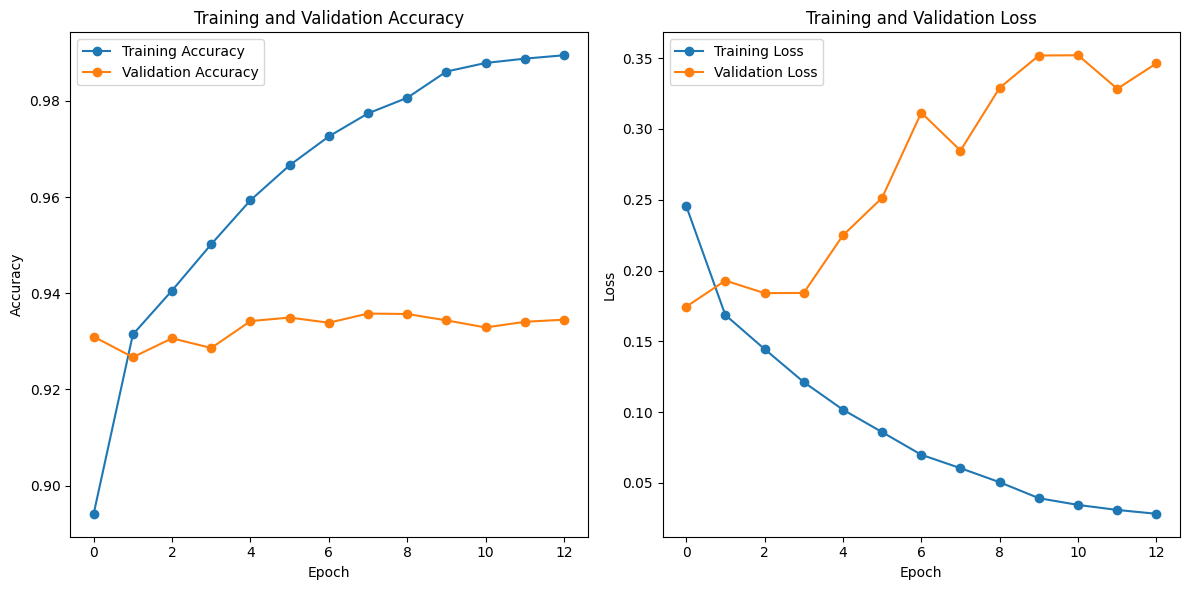

In [9]:
hlp.plot_history(history)

In [10]:
import os
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

def extract_epoch_number(dir):
    files = os.listdir(dir)
    epoch = 0
    for file in files:
        if 'model_epoch' in file:
            epoch = max(epoch, int(file.split('_')[-1]))
    return epoch

path = f'../saved_models/{NAME}'
epoch = extract_epoch_number(path)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = AutoTokenizer.from_pretrained(f'{path}/tokenizer')
model = AutoModelForSequenceClassification.from_pretrained(f'{path}/model_epoch_{epoch}', num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
model = model.to(device)

In [11]:
test_data_loader = hlp.create_data_loader(test_texts, test_labels, tokenizer, MAX_LEN, BATCH_SIZE)

test_acc, test_loss, test_label_actual, test_label_pred = hlp.eval_model(model, test_data_loader, device)

print(f'Test Accuracy: {test_acc} Test Loss: {test_loss}')

Test Accuracy: 0.934124687300731 Test Loss: 0.2707532342891194


Accuracy: 0.93
F1 Score: 0.93
Precision: 0.93
Recall: 0.93

Classification Report:
              precision    recall  f1-score   support

    Non-Hate       0.95      0.92      0.93     10470
        Hate       0.92      0.95      0.93      9917

    accuracy                           0.93     20387
   macro avg       0.93      0.93      0.93     20387
weighted avg       0.93      0.93      0.93     20387



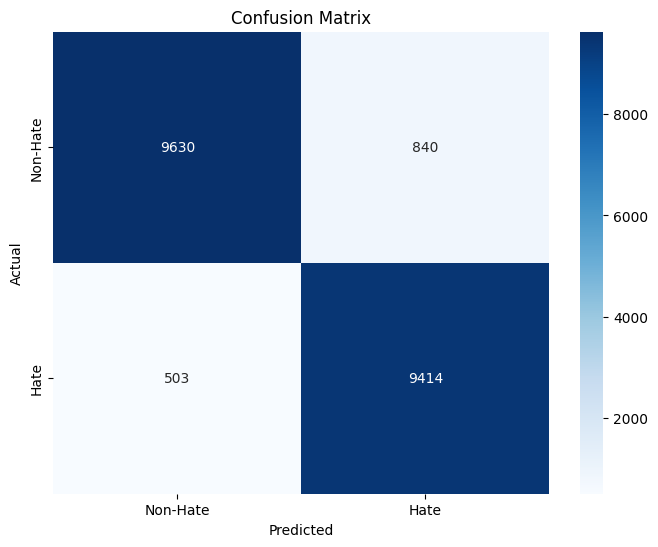

In [12]:
hlp.plot_confusion_matrix(test_label_actual, test_label_pred, ['Non-Hate', 'Hate'])

In [13]:
test_texts = ["This is the sort of thing that happens in a shithole country. @URL"]
preds, confidence = hlp.predict(test_texts, model, tokenizer, MAX_LEN, device)

if preds[0] == 1:
    print(f'Predicted class: Hate Speech \nConfidence: {confidence[0][1]:.2f}')
else:
    print(f'Predicted class: Not Hate Speech \nConfidence: {confidence[0][0]:.2f}')

Predicted class: Hate Speech 
Confidence: 0.64
